Generate a TensorFlow model that predicts values in a sinewave. Based on the code by Pete Warden at https://github.com/tensorflow/tensorflow/blob/master/tensorflow/lite/micro/examples/hello_world/create_sine_model.ipynb

In [17]:
%tensorflow_version 2.1

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

In [19]:
# Print versions
!python --version
print('Numpy ' + np.__version__)
print('TensorFlow ' + tf.__version__)
print('Keras ' + tf.keras.__version__)

Python 3.12.12
Numpy 2.0.2
TensorFlow 2.19.0
Keras 3.10.0


In [20]:
# Settings
nsamples = 1000     # Number of samples to use as a dataset
val_ratio = 0.2     # Percentage of samples that should be held for validation set
test_ratio = 0.2    # Percentage of samples that should be held for test set
tflite_model_name = 'sine_model'  # Will be given .tflite suffix
c_model_name = 'sine_model'       # Will be given .h suffix

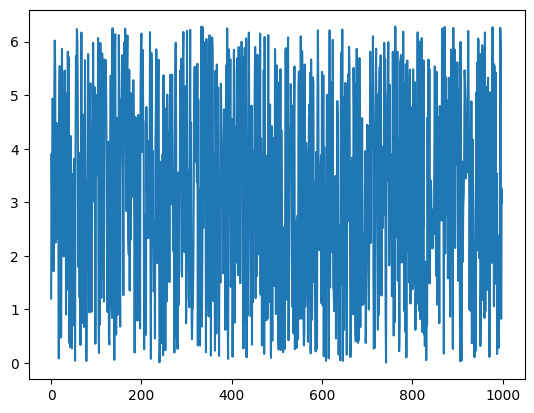

In [21]:
# Generate some random samples
np.random.seed(1234)
x_values = np.random.uniform(low=0, high=(2 * math.pi), size=nsamples)
plt.plot(x_values)

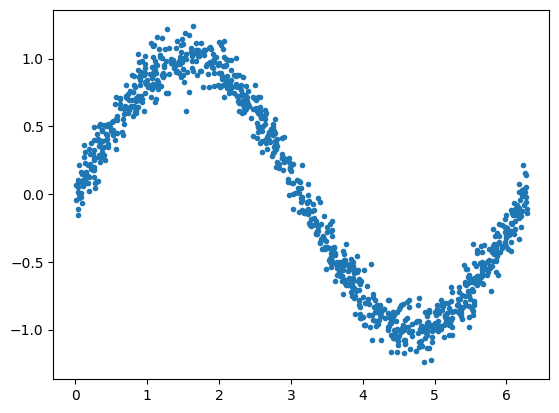

In [22]:
# Create a noisy sinewave with these values
y_values = np.sin(x_values) + (0.1 * np.random.randn(x_values.shape[0]))
plt.plot(x_values, y_values, '.')

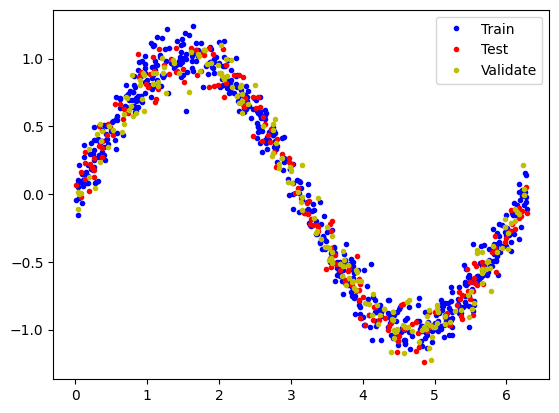

In [23]:
# Plot the dataset into training, validation, and test sets
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, [val_split, test_split])

# Check that our splits add up correctly
assert(x_train.size + x_val.size + x_test.size) == nsamples

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()

In [24]:
# Create a model
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

In [25]:
# View model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

In [34]:
# Train model
history = model.fit(x_train,
                    y_train,
                    epochs=600,
                    batch_size=100,
                    validation_data=(x_val, y_val))

Epoch 1/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1143 - mae: 0.1143 - val_loss: 0.1112 - val_mae: 0.1112
Epoch 2/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1049 - mae: 0.1049 - val_loss: 0.1125 - val_mae: 0.1125
Epoch 3/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1097 - mae: 0.1097 - val_loss: 0.1131 - val_mae: 0.1131
Epoch 4/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1115 - mae: 0.1115 - val_loss: 0.1123 - val_mae: 0.1123
Epoch 5/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1111 - mae: 0.1111 - val_loss: 0.1112 - val_mae: 0.1112
Epoch 6/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1107 - mae: 0.1107 - val_loss: 0.1130 - val_mae: 0.1130
Epoch 7/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1037 - mae: 0.1037 - val_loss: 0.1096 - val_mae: 0.1096
Epoch 8/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1070 - mae: 0.1070 - val_loss: 0.1188 - val_mae: 0.1188
Epoch 9/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1152 - mae: 

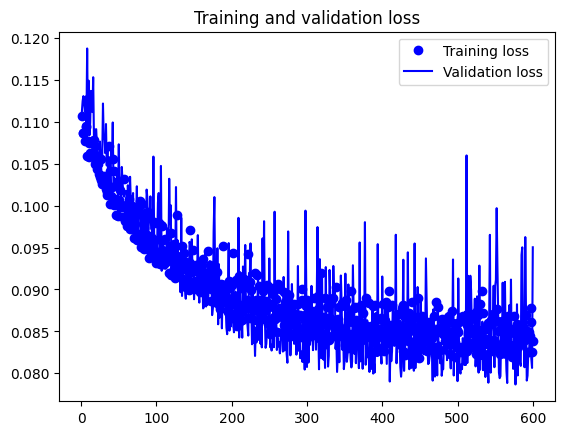

In [35]:
# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


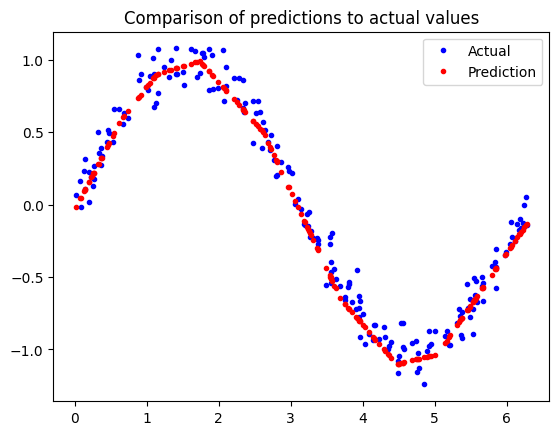

In [36]:
# Plot predictions against actual values
predictions = model.predict(x_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()

In [37]:
# Test a few numbers
model.predict(np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[-0.02751535],
       [ 0.8169875 ],
       [ 0.8459852 ],
       [ 0.09081793],
       [-0.829896  ],
       [-1.0371933 ],
       [-0.3340851 ]], dtype=float32)

In [31]:
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

Saved artifact at '/tmp/tmphus8xomb'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_7')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137279503859792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137279503860176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137279503860944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137279503871888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137279503860368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137279503870736: TensorSpec(shape=(), dtype=tf.resource, name=None)


3164

In [32]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [33]:
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))